In [164]:
import os
import requests
import pandas as pd
from dotenv import load_dotenv

import alpaca_trade_api as tradeapi

%matplotlib inline

import numpy as np
from pathlib import Path
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from pandas.tseries.offsets import DateOffset
from sklearn.metrics import classification_report

In [165]:
load_dotenv()

True

In [166]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
alpaca = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version='v2')

In [167]:
today = pd.Timestamp('2023-06-29', tz='America/New_York').isoformat()
today

'2023-06-29T00:00:00-04:00'

In [168]:
tickers=["IWV", "IWB", "IWF", "IWD", "IWM", "IWO", "IWN"]

In [169]:
start = pd.Timestamp('2017-12-31', tz='America/New_York').isoformat()
end = pd.Timestamp('2023-06-30', tz='America/New_York').isoformat()
timeframe="1D"

In [170]:
portfolio_df_year = alpaca.get_bars(tickers, timeframe, start=start, end=end).df
portfolio_df_year.tail(10)

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2023-06-16 04:00:00+00:00,254.380,254.3800,252.0000,252.21,168207,1516,252.790128,IWV
2023-06-20 04:00:00+00:00,251.060,251.4500,249.6600,250.92,147526,1488,250.875448,IWV
2023-06-21 04:00:00+00:00,250.140,250.6800,249.1978,249.52,76162,1028,249.828877,IWV
2023-06-22 04:00:00+00:00,248.800,250.2500,248.6300,250.13,162343,1361,249.553070,IWV
2023-06-23 04:00:00+00:00,247.920,249.1600,247.9200,248.04,147237,971,248.460496,IWV
2023-06-26 04:00:00+00:00,247.910,249.1288,247.1900,247.23,416006,1479,248.214102,IWV
2023-06-27 04:00:00+00:00,247.910,250.6100,247.8900,250.18,84572,785,249.955144,IWV
2023-06-28 04:00:00+00:00,249.520,251.0784,249.2700,250.55,113390,1165,250.067020,IWV
2023-06-29 04:00:00+00:00,250.600,251.7590,250.4900,251.75,96257,1108,251.254258,IWV


In [171]:
IWV=portfolio_df_year[portfolio_df_year['symbol']=='IWV'].drop('symbol', axis=1)
IWB=portfolio_df_year[portfolio_df_year['symbol']=='IWB'].drop('symbol', axis=1)
IWF=portfolio_df_year[portfolio_df_year['symbol']=='IWF'].drop('symbol', axis=1)
IWD=portfolio_df_year[portfolio_df_year['symbol']=='IWD'].drop('symbol', axis=1)
IWM=portfolio_df_year[portfolio_df_year['symbol']=='IWM'].drop('symbol', axis=1)
IWO=portfolio_df_year[portfolio_df_year['symbol']=='IWO'].drop('symbol', axis=1)
IWN=portfolio_df_year[portfolio_df_year['symbol']=='IWN'].drop('symbol', axis=1)
display(IWV.head())
display(IWB.head())
display(IWF.head())
display(IWD.head())
display(IWM.head())
display(IWO.head())
display(IWN.head())

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2018-01-02 05:00:00+00:00,158.71,159.37,158.50,159.37,409204,2420,158.983899
2018-01-03 05:00:00+00:00,159.47,160.31,159.47,160.21,248176,1579,160.031778
2018-01-04 05:00:00+00:00,160.70,161.13,160.69,160.88,382384,2091,160.949258
2018-01-05 05:00:00+00:00,161.50,161.90,161.08,161.82,256007,1604,161.513522
2018-01-08 05:00:00+00:00,161.83,162.26,161.48,162.14,792661,2962,161.957999


,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2018-01-02 05:00:00+00:00,149.12,149.72,148.95,149.70,1175919,4165,149.506616
2018-01-03 05:00:00+00:00,149.86,150.69,149.84,150.60,688886,4676,150.398810
2018-01-04 05:00:00+00:00,151.05,151.51,151.00,151.23,942283,4927,151.242624
2018-01-05 05:00:00+00:00,151.73,152.24,151.41,152.15,868129,5286,151.825484
2018-01-08 05:00:00+00:00,152.04,152.58,151.92,152.46,821156,4440,152.319447


,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2018-01-02 05:00:00+00:00,135.34,135.990,135.00,135.97,2446479,13955,135.663127
2018-01-03 05:00:00+00:00,136.16,137.230,136.13,137.13,2129811,11954,136.926769
2018-01-04 05:00:00+00:00,137.66,138.000,137.56,137.70,1769589,10420,137.736451
2018-01-05 05:00:00+00:00,138.28,139.025,138.11,138.95,1866331,11639,138.632010
2018-01-08 05:00:00+00:00,138.89,139.435,138.85,139.34,1813142,9868,139.245522


,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2018-01-02 05:00:00+00:00,124.78,124.93,124.40,124.91,2319840,10412,124.692497
2018-01-03 05:00:00+00:00,124.94,125.45,124.87,125.38,1473673,7863,125.228223
2018-01-04 05:00:00+00:00,125.64,126.13,125.50,125.86,2322439,10724,125.914151
2018-01-05 05:00:00+00:00,126.24,126.36,125.76,126.28,1901513,10458,126.041228
2018-01-08 05:00:00+00:00,126.24,126.56,125.94,126.48,2122527,9797,126.306269


,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2018-01-02 05:00:00+00:00,153.20,153.97,152.4600,153.87,20489647,81444,153.401426
2018-01-03 05:00:00+00:00,153.87,154.46,153.5199,154.09,21836626,76614,154.028284
2018-01-04 05:00:00+00:00,154.97,155.15,154.0200,154.43,14087303,70004,154.510259
2018-01-05 05:00:00+00:00,154.89,154.98,153.9400,154.80,19984046,89250,154.525225
2018-01-08 05:00:00+00:00,154.73,155.27,153.5000,155.05,18457323,68337,154.716537


,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2018-01-02 05:00:00+00:00,187.30,188.530,186.55,188.52,933956,6827,187.906804
2018-01-03 05:00:00+00:00,188.46,189.479,188.40,189.13,568977,5402,188.972049
2018-01-04 05:00:00+00:00,190.38,190.630,189.18,189.61,416794,3906,189.710259
2018-01-05 05:00:00+00:00,190.37,190.370,189.22,190.17,503994,4130,189.942368
2018-01-08 05:00:00+00:00,190.06,190.400,188.31,190.04,509496,3645,189.746390


,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2018-01-02 05:00:00+00:00,126.34,126.97,125.7900,126.83,1621528,8859,126.547335
2018-01-03 05:00:00+00:00,126.89,127.17,126.2800,126.69,1157208,8989,126.707306
2018-01-04 05:00:00+00:00,127.43,127.47,126.5914,126.97,2160953,8233,126.989071
2018-01-05 05:00:00+00:00,127.14,127.34,126.4500,127.17,958946,7389,126.878912
2018-01-08 05:00:00+00:00,127.12,127.79,126.3800,127.64,990702,6448,127.325188


In [172]:
signals_df = IWN.loc[:, ["close"]]

In [173]:
signals_df.head()

,close
timestamp,
2018-01-02 05:00:00+00:00,126.83
2018-01-03 05:00:00+00:00,126.69
2018-01-04 05:00:00+00:00,126.97
2018-01-05 05:00:00+00:00,127.17
2018-01-08 05:00:00+00:00,127.64


In [174]:
signals_df.index = signals_df.index.date

In [175]:
signals_df.head()

,close
2018-01-02,126.83
2018-01-03,126.69
2018-01-04,126.97
2018-01-05,127.17
2018-01-08,127.64


In [176]:
signals_df["Actual Returns"] = signals_df["close"].pct_change()

In [177]:
signals_df = signals_df.dropna()
signals_df

,close,Actual Returns
2018-01-03,126.69,-0.001104
2018-01-04,126.97,0.002210
2018-01-05,127.17,0.001575
2018-01-08,127.64,0.003696
2018-01-09,127.26,-0.002977
...,...,...
2023-06-26,136.34,0.004050
2023-06-27,138.40,0.015109
2023-06-28,138.82,0.003035
2023-06-29,140.75,0.013903


In [178]:
short_window = 5
long_window = 100

signals_df['SMA_Fast'] = signals_df['close'].rolling(window=short_window).mean()
signals_df['SMA_Slow'] = signals_df['close'].rolling(window=long_window).mean()

signals_df = signals_df.dropna()

In [179]:
signals_df['Signal'] = 0.0

C:\Users\mdcod\AppData\Local\Temp\ipykernel_11616\3786617811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signals_df['Signal'] = 0.0


In [180]:
signals_df.loc[(signals_df['Actual Returns'] >= 0), 'Signal'] = 1

signals_df.loc[(signals_df['Actual Returns'] < 0), 'Signal'] = -1

In [181]:
display(signals_df.head())
display(signals_df.tail())

,close,Actual Returns,SMA_Fast,SMA_Slow,Signal
2018-05-25,130.92,-0.002666,131.300,125.5572,-1.0
2018-05-29,130.54,-0.002903,131.060,125.5957,-1.0
2018-05-30,132.62,0.015934,131.344,125.6522,1.0
2018-05-31,131.37,-0.009425,131.344,125.6942,-1.0
2018-06-01,132.15,0.005937,131.520,125.7393,1.0


,close,Actual Returns,SMA_Fast,SMA_Slow,Signal
2023-06-26,136.34,0.004050,137.714,138.9611,1.0
2023-06-27,138.40,0.015109,137.464,138.8063,1.0
2023-06-28,138.82,0.003035,137.400,138.6249,1.0
2023-06-29,140.75,0.013903,138.020,138.4688,1.0
2023-06-30,140.80,0.000355,139.022,138.3350,1.0


In [182]:
signals_df['Signal'].value_counts()

 1.0    652
-1.0    631
Name: Signal, dtype: int64

In [183]:
signals_df['Strategy Returns'] = signals_df['Actual Returns'] * signals_df['Signal'].shift()

display(signals_df.head())
display(signals_df.tail())

C:\Users\mdcod\AppData\Local\Temp\ipykernel_11616\1199835210.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signals_df['Strategy Returns'] = signals_df['Actual Returns'] * signals_df['Signal'].shift()


,close,Actual Returns,SMA_Fast,SMA_Slow,Signal,Strategy Returns
2018-05-25,130.92,-0.002666,131.300,125.5572,-1.0,NaN
2018-05-29,130.54,-0.002903,131.060,125.5957,-1.0,0.002903
2018-05-30,132.62,0.015934,131.344,125.6522,1.0,-0.015934
2018-05-31,131.37,-0.009425,131.344,125.6942,-1.0,-0.009425
2018-06-01,132.15,0.005937,131.520,125.7393,1.0,-0.005937


,close,Actual Returns,SMA_Fast,SMA_Slow,Signal,Strategy Returns
2023-06-26,136.34,0.004050,137.714,138.9611,1.0,-0.004050
2023-06-27,138.40,0.015109,137.464,138.8063,1.0,0.015109
2023-06-28,138.82,0.003035,137.400,138.6249,1.0,0.003035
2023-06-29,140.75,0.013903,138.020,138.4688,1.0,0.013903
2023-06-30,140.80,0.000355,139.022,138.3350,1.0,0.000355


<Axes: >

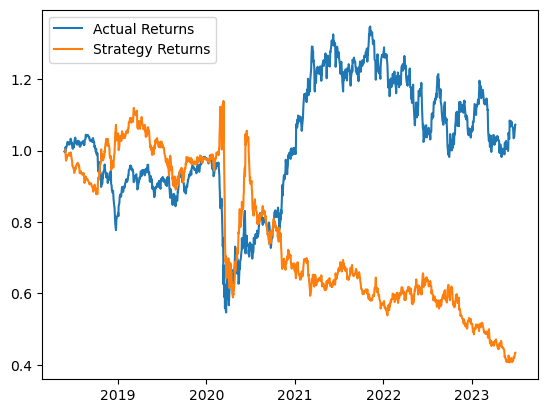

In [184]:
plt1 = (1 + signals_df[["Actual Returns", "Strategy Returns"]]).cumprod().plot()
plt1

In [185]:
X = signals_df[['SMA_Fast', 'SMA_Slow']].shift().dropna().copy()

X.head()

,SMA_Fast,SMA_Slow
2018-05-29,131.300,125.5572
2018-05-30,131.060,125.5957
2018-05-31,131.344,125.6522
2018-06-01,131.344,125.6942
2018-06-04,131.520,125.7393


In [186]:
y = signals_df['Signal']

y.value_counts()

 1.0    652
-1.0    631
Name: Signal, dtype: int64

In [187]:
training_begin = X.index.min()
print(training_begin)

2018-05-29


In [188]:
training_end = X.index.min() + DateOffset(months=3)

In [189]:
X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]

X_train.head()

C:\Users\mdcod\AppData\Local\Temp\ipykernel_11616\2073402406.py:1: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  X_train = X.loc[training_begin:training_end]
C:\Users\mdcod\AppData\Local\Temp\ipykernel_11616\2073402406.py:2: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  y_train = y.loc[training_begin:training_end]


,SMA_Fast,SMA_Slow
2018-05-29,131.300,125.5572
2018-05-30,131.060,125.5957
2018-05-31,131.344,125.6522
2018-06-01,131.344,125.6942
2018-06-04,131.520,125.7393


In [190]:
X_test = X.loc[training_end+DateOffset(days=1):]
y_test = y.loc[training_end+DateOffset(days=1):]


X_train.tail()

C:\Users\mdcod\AppData\Local\Temp\ipykernel_11616\1755475374.py:1: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  X_test = X.loc[training_end+DateOffset(days=1):]
C:\Users\mdcod\AppData\Local\Temp\ipykernel_11616\1755475374.py:2: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  y_test = y.loc[training_end+DateOffset(days=1):]


,SMA_Fast,SMA_Slow
2018-08-23,135.852,130.9655
2018-08-24,136.246,131.1191
2018-08-27,136.586,131.2625
2018-08-28,136.838,131.3944
2018-08-29,136.770,131.5473


In [191]:
scaler = StandardScaler()

X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [192]:
svm_model = svm.SVC()
 

svm_model = svm_model.fit(X_train_scaled, y_train)
 

svm_pred = svm_model.predict(X_test_scaled)

len(svm_pred)

1216

In [193]:
svm_testing_report = classification_report(y_test, svm_pred)
print(svm_testing_report)

              precision    recall  f1-score   support

        -1.0       0.50      0.00      0.01       600
         1.0       0.51      1.00      0.67       616

    accuracy                           0.51      1216
   macro avg       0.50      0.50      0.34      1216
weighted avg       0.50      0.51      0.34      1216



In [194]:

predictions_df = pd.DataFrame(index=X_test.index)


predictions_df['Predicted'] = svm_pred


predictions_df['Actual Returns'] = signals_df['Actual Returns']


predictions_df['Strategy Returns'] = signals_df['Strategy Returns'] * predictions_df['Predicted']


display(predictions_df.head())
display(predictions_df.tail())

,Predicted,Actual Returns,Strategy Returns
2018-08-30,-1.0,-0.001826,0.001826
2018-08-31,-1.0,0.001683,0.001683
2018-09-04,-1.0,-0.005772,0.005772
2018-09-05,-1.0,0.000441,0.000441
2018-09-06,1.0,-0.005436,-0.005436


,Predicted,Actual Returns,Strategy Returns
2023-06-26,1.0,0.004050,-0.004050
2023-06-27,1.0,0.015109,0.015109
2023-06-28,1.0,0.003035,0.003035
2023-06-29,1.0,0.013903,0.013903
2023-06-30,1.0,0.000355,0.000355


In [195]:
# Import a new classifier from SKLearn
from sklearn.linear_model import LogisticRegression
logistic_regression_model = LogisticRegression()

# Initiate the model instance
logistic_regression_model

LogisticRegression()

In [196]:
# Fit the model using the training data
model = logistic_regression_model.fit(X_train_scaled, y_train)

# Use the testing dataset to generate the predictions for the new model
pred = logistic_regression_model.predict(X_test_scaled)

# Review the model's predicted values
pred[:5]

array([-1., -1., -1., -1., -1.])

In [197]:
# Use a classification report to evaluate the model using the predictions and testing data
class_report = classification_report(y_test, pred)

# Print the classification report
print(class_report)

              precision    recall  f1-score   support

        -1.0       0.50      0.42      0.46       600
         1.0       0.51      0.60      0.55       616

    accuracy                           0.51      1216
   macro avg       0.51      0.51      0.51      1216
weighted avg       0.51      0.51      0.51      1216



In [198]:
# Create a new empty predictions DataFrame.

# Create a predictions DataFrame
predictions_df2 = pd.DataFrame(index=X_test.index)

# Add the SVM model predictions to the DataFrame
predictions_df2['Predicted'] = pred

# Add the actual returns to the DataFrame
predictions_df2['Actual Returns'] = signals_df['Actual Returns']

# Add the strategy returns to the DataFrame
predictions_df2['Strategy Returns'] = predictions_df2['Actual Returns'] * predictions_df2['Predicted']

# Review the DataFrame
display(predictions_df2.head())
display(predictions_df2.tail())

,Predicted,Actual Returns,Strategy Returns
2018-08-30,-1.0,-0.001826,0.001826
2018-08-31,-1.0,0.001683,-0.001683
2018-09-04,-1.0,-0.005772,0.005772
2018-09-05,-1.0,0.000441,-0.000441
2018-09-06,-1.0,-0.005436,0.005436


,Predicted,Actual Returns,Strategy Returns
2023-06-26,1.0,0.004050,0.004050
2023-06-27,1.0,0.015109,0.015109
2023-06-28,1.0,0.003035,0.003035
2023-06-29,1.0,0.013903,0.013903
2023-06-30,1.0,0.000355,0.000355


<Axes: >

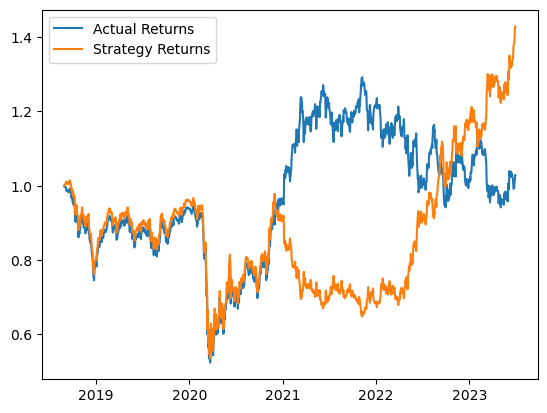

In [199]:
plt2 = (1 + predictions_df2[["Actual Returns", "Strategy Returns"]]).cumprod().plot()
plt2

In [200]:
display(IWV.head())
display(IWB.head())
display(IWF.head())
display(IWD.head())
display(IWM.head())
display(IWO.head())
display(IWN.head())

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2018-01-02 05:00:00+00:00,158.71,159.37,158.50,159.37,409204,2420,158.983899
2018-01-03 05:00:00+00:00,159.47,160.31,159.47,160.21,248176,1579,160.031778
2018-01-04 05:00:00+00:00,160.70,161.13,160.69,160.88,382384,2091,160.949258
2018-01-05 05:00:00+00:00,161.50,161.90,161.08,161.82,256007,1604,161.513522
2018-01-08 05:00:00+00:00,161.83,162.26,161.48,162.14,792661,2962,161.957999


,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2018-01-02 05:00:00+00:00,149.12,149.72,148.95,149.70,1175919,4165,149.506616
2018-01-03 05:00:00+00:00,149.86,150.69,149.84,150.60,688886,4676,150.398810
2018-01-04 05:00:00+00:00,151.05,151.51,151.00,151.23,942283,4927,151.242624
2018-01-05 05:00:00+00:00,151.73,152.24,151.41,152.15,868129,5286,151.825484
2018-01-08 05:00:00+00:00,152.04,152.58,151.92,152.46,821156,4440,152.319447


,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2018-01-02 05:00:00+00:00,135.34,135.990,135.00,135.97,2446479,13955,135.663127
2018-01-03 05:00:00+00:00,136.16,137.230,136.13,137.13,2129811,11954,136.926769
2018-01-04 05:00:00+00:00,137.66,138.000,137.56,137.70,1769589,10420,137.736451
2018-01-05 05:00:00+00:00,138.28,139.025,138.11,138.95,1866331,11639,138.632010
2018-01-08 05:00:00+00:00,138.89,139.435,138.85,139.34,1813142,9868,139.245522


,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2018-01-02 05:00:00+00:00,124.78,124.93,124.40,124.91,2319840,10412,124.692497
2018-01-03 05:00:00+00:00,124.94,125.45,124.87,125.38,1473673,7863,125.228223
2018-01-04 05:00:00+00:00,125.64,126.13,125.50,125.86,2322439,10724,125.914151
2018-01-05 05:00:00+00:00,126.24,126.36,125.76,126.28,1901513,10458,126.041228
2018-01-08 05:00:00+00:00,126.24,126.56,125.94,126.48,2122527,9797,126.306269


,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2018-01-02 05:00:00+00:00,153.20,153.97,152.4600,153.87,20489647,81444,153.401426
2018-01-03 05:00:00+00:00,153.87,154.46,153.5199,154.09,21836626,76614,154.028284
2018-01-04 05:00:00+00:00,154.97,155.15,154.0200,154.43,14087303,70004,154.510259
2018-01-05 05:00:00+00:00,154.89,154.98,153.9400,154.80,19984046,89250,154.525225
2018-01-08 05:00:00+00:00,154.73,155.27,153.5000,155.05,18457323,68337,154.716537


,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2018-01-02 05:00:00+00:00,187.30,188.530,186.55,188.52,933956,6827,187.906804
2018-01-03 05:00:00+00:00,188.46,189.479,188.40,189.13,568977,5402,188.972049
2018-01-04 05:00:00+00:00,190.38,190.630,189.18,189.61,416794,3906,189.710259
2018-01-05 05:00:00+00:00,190.37,190.370,189.22,190.17,503994,4130,189.942368
2018-01-08 05:00:00+00:00,190.06,190.400,188.31,190.04,509496,3645,189.746390


,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2018-01-02 05:00:00+00:00,126.34,126.97,125.7900,126.83,1621528,8859,126.547335
2018-01-03 05:00:00+00:00,126.89,127.17,126.2800,126.69,1157208,8989,126.707306
2018-01-04 05:00:00+00:00,127.43,127.47,126.5914,126.97,2160953,8233,126.989071
2018-01-05 05:00:00+00:00,127.14,127.34,126.4500,127.17,958946,7389,126.878912
2018-01-08 05:00:00+00:00,127.12,127.79,126.3800,127.64,990702,6448,127.325188


In [201]:
IWV_returns= IWV.loc[:, ["close"]].pct_change().dropna()
IWB_returns= IWB.loc[:, ["close"]].pct_change().dropna()
IWF_returns= IWF.loc[:, ["close"]].pct_change().dropna()
IWD_returns= IWD.loc[:, ["close"]].pct_change().dropna()
IWM_returns= IWM.loc[:, ["close"]].pct_change().dropna()
IWO_returns= IWO.loc[:, ["close"]].pct_change().dropna()
IWN_returns= IWN.loc[:, ["close"]].pct_change().dropna()

In [202]:
IWV_returns.columns=["R3T"]
IWB_returns.columns=["R1T"]
IWF_returns.columns=["R1G"]
IWD_returns.columns=["R1V"]
IWM_returns.columns=["R2T"]
IWO_returns.columns=["R2G"]
IWN_returns.columns=["R2V"]

In [203]:
joined_returns = pd.concat([IWV_returns, IWB_returns, IWF_returns, IWD_returns, IWM_returns, IWO_returns, IWN_returns], axis="columns", join="inner")
joined_returns.head()

,R3T,R1T,R1G,R1V,R2T,R2G,R2V
timestamp,,,,,,,
2018-01-03 05:00:00+00:00,0.005271,0.006012,0.008531,0.003763,0.001430,0.003236,-0.001104
2018-01-04 05:00:00+00:00,0.004182,0.004183,0.004157,0.003828,0.002207,0.002538,0.002210
2018-01-05 05:00:00+00:00,0.005843,0.006083,0.009078,0.003337,0.002396,0.002953,0.001575
2018-01-08 05:00:00+00:00,0.001978,0.002037,0.002807,0.001584,0.001615,-0.000684,0.003696
2018-01-09 05:00:00+00:00,0.001727,0.002165,0.002081,0.001502,-0.001483,0.001105,-0.002977


In [204]:
joined_cumulative = (1+joined_returns).cumprod()

<Axes: title={'center': 'Cumulative Performance'}, xlabel='timestamp'>

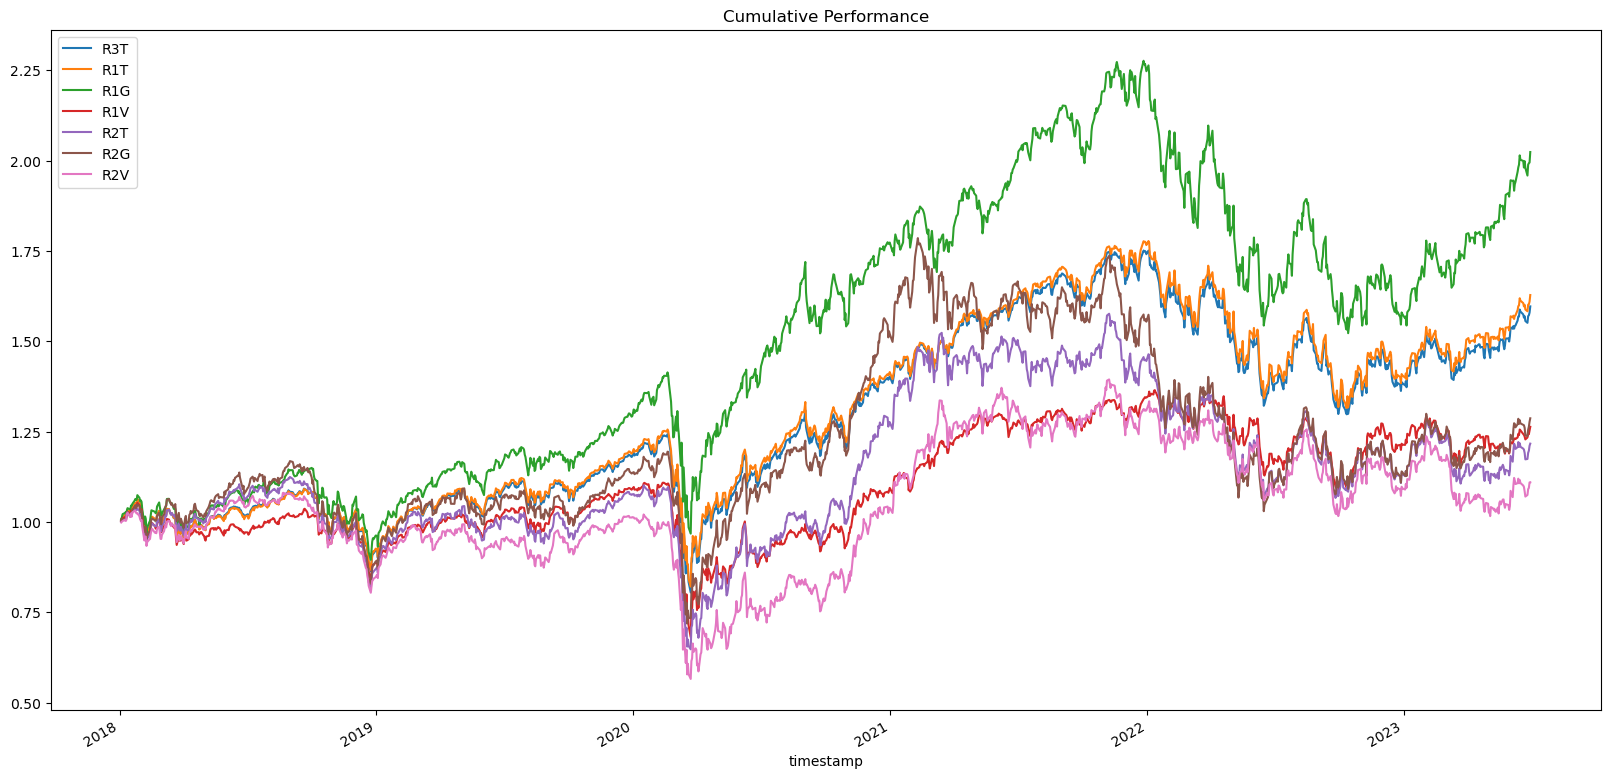

In [205]:
joined_cumulative.plot(figsize=(20,10), title="Cumulative Performance")